#### Import related library 

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#### Load dataset clothing

<ol>
    <li>Remove null value</li>
    <li>define <i><b>X</b></i> as input set</li>
    <li>define <i><b>y</b></i> as target set</li>
    </ol>

In [18]:
df = pd.read_csv("Clothing.csv", delimiter=",")

df = df.sort_values(['start'], ascending=True)
df = df.dropna()

X = df[df.columns[1:12]].values.astype(float)
y = df[df.columns[0:1]].values.astype(float)

df = df.reset_index(drop=True)

df.head(10)  #only display first 10 row

,tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,976817,6105.106,31.0,2.0,1.0000,1.0000,1.3673,126,23.47549,22207.04,22859.85,160,1945
1,750000,8823.529,42.0,1.0,1.0000,1.2833,1.3673,84,18.06219,22207.04,22859.85,85,1945
2,694227,7713.633,41.0,1.0,1.9231,1.0000,1.0000,62,12.59369,2500.00,2500.00,90,1945
3,955867,6827.622,43.0,1.0,2.0000,3.0000,1.5357,122,16.18960,9000.00,7600.00,140,1945
4,565400,14135.000,44.0,1.0,3.0000,2.0741,1.3333,167,22.54502,62269.23,5000.00,40,1945
5,694227,5833.840,41.0,2.0,2.2656,1.0000,1.3333,108,16.36636,62269.23,16624.89,119,1945
6,495340,4953.400,37.0,1.0,1.9556,1.0000,1.3673,74,13.90220,22207.04,5000.00,100,1945
7,845000,4225.000,40.0,1.0,1.0000,2.0000,1.0000,144,28.80000,17166.67,27177.04,200,1946
8,495340,6604.533,44.0,2.0,2.2656,2.0741,1.0000,104,14.16952,62269.23,16624.89,75,1946
9,716000,7955.556,38.0,1.0,2.0000,2.0741,2.0000,108,15.26696,62269.23,1750.00,90,1946


#### Normalize all the input and target set using <i><b>MinMaxScaler</b></i>

In [19]:
scaler = MinMaxScaler()

xscale = scaler.fit_transform(X)
yscale = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

<br>
#### Define the Neural Network model structure
<ol>
    <li>Input layer with <i><b>11</b></i> neurons</li>
    <li><i><b>First</b></i> hidden layer with <i><b>12</b></i> neurons</li>
    <li><i><b>Second</b></i> hidden layer with <i><b>8</b></i> neurons</li>
    <li>Output layer with single output</li>
    <li>Activation function used are <i><b>Rectifier</b></i> and <i><b>Linear Activation Function</b></i> for generates output</li>
    <li>Optimizer used is <i><b>Adamax</b></i> with <i><b>0.001 learning rate</b></i></li>
    <li>Epoch number is <i><b>100</b></i></li>
    <li>Batch size is <i><b>50</b></i></li>
    </ol>


In [20]:
from keras import optimizers

adam = optimizers.Adam(lr=0.001)

test_split = 0.2

model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])  # mse - mean squared error, mae - mean absolute error

classifier = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=test_split)



Train on 240 samples, validate on 60 samples
Epoch 1/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - mean_absolute_error: 0.1415 - val_loss: 0.0289 - val_mean_squared_error: 0.0289 - val_mean_absolute_error: 0.1334
Epoch 2/100
240/240 [==============================] - 0s 42us/step - loss: 0.0262 - mean_squared_error: 0.0262 - mean_absolute_error: 0.1138 - val_loss: 0.0213 - val_mean_squared_error: 0.0213 - val_mean_absolute_error: 0.1114
Epoch 3/100
240/240 [==============================] - 0s 37us/step - loss: 0.0213 - mean_squared_error: 0.0213 - mean_absolute_error: 0.0958 - val_loss: 0.0166 - val_mean_squared_error: 0.0166 - val_mean_absolute_error: 0.0944
Epoch 4/100
240/240 [==============================] - 0s 67us/step - loss: 0.0174 - mean_squared_error: 0.0174 - mean_absolute_error: 0.0814 - val_loss: 0.0130 - val_mean_squared_error: 0.0130 - val_mean_absolute_error: 0.0815
Epoch 5/100
240/240 [=======================

Epoch 37/100
240/240 [==============================] - 0s 33us/step - loss: 0.0055 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0486 - val_loss: 0.0041 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0462
Epoch 38/100
240/240 [==============================] - 0s 42us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0478 - val_loss: 0.0040 - val_mean_squared_error: 0.0040 - val_mean_absolute_error: 0.0457
Epoch 39/100
240/240 [==============================] - 0s 33us/step - loss: 0.0052 - mean_squared_error: 0.0052 - mean_absolute_error: 0.0470 - val_loss: 0.0040 - val_mean_squared_error: 0.0040 - val_mean_absolute_error: 0.0451
Epoch 40/100
240/240 [==============================] - 0s 46us/step - loss: 0.0051 - mean_squared_error: 0.0051 - mean_absolute_error: 0.0462 - val_loss: 0.0040 - val_mean_squared_error: 0.0040 - val_mean_absolute_error: 0.0449
Epoch 41/100
240/240 [==============================] - 0s 33us/step - loss: 0.0049 

Epoch 73/100
240/240 [==============================] - 0s 37us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0394 - val_loss: 0.0055 - val_mean_squared_error: 0.0055 - val_mean_absolute_error: 0.0412
Epoch 74/100
240/240 [==============================] - 0s 37us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0394 - val_loss: 0.0056 - val_mean_squared_error: 0.0056 - val_mean_absolute_error: 0.0412
Epoch 75/100
240/240 [==============================] - 0s 37us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0395 - val_loss: 0.0055 - val_mean_squared_error: 0.0055 - val_mean_absolute_error: 0.0414
Epoch 76/100
240/240 [==============================] - 0s 50us/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0394 - val_loss: 0.0055 - val_mean_squared_error: 0.0055 - val_mean_absolute_error: 0.0414
Epoch 77/100
240/240 [==============================] - 0s 42us/step - loss: 0.0034 

<br>
#### Comparison of <b><i>Mean Squared Error</i></b> from training and testing  

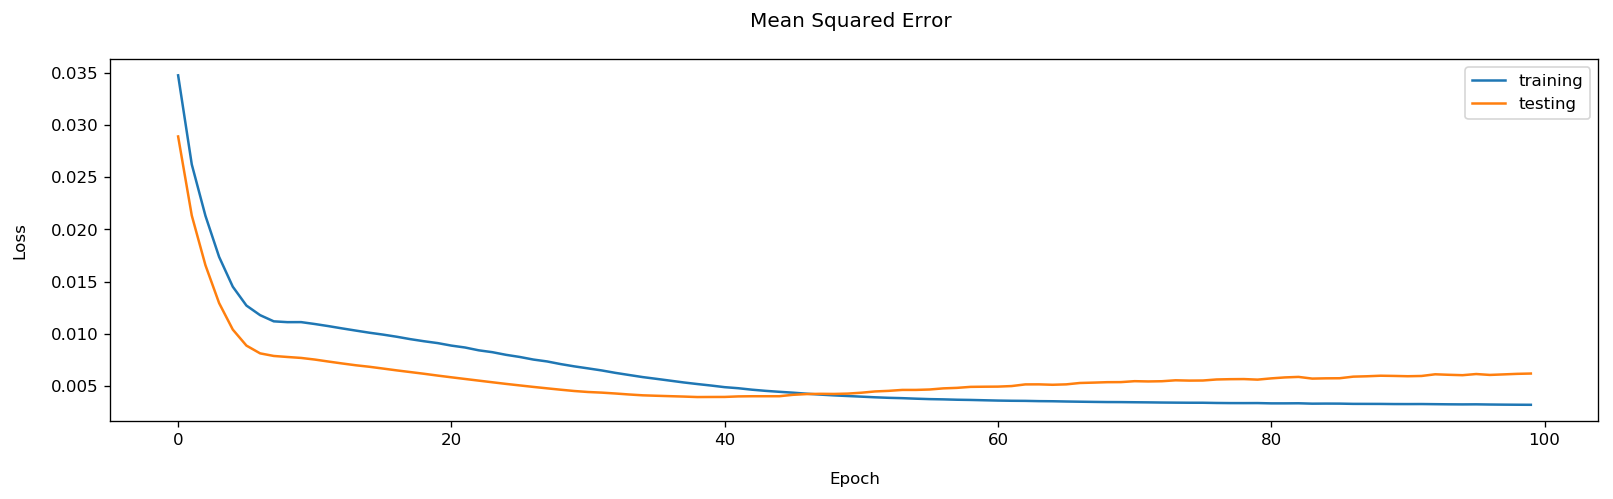

In [21]:
plt.figure(dpi=120, figsize=(16,4))

#print(classifier.history.keys())

plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('Mean Squared Error \n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['training', 'testing'], loc='upper right')
plt.show()

<br>
#### Comparison of <b><i>Mean Absolute Error</i></b> from training and testing  

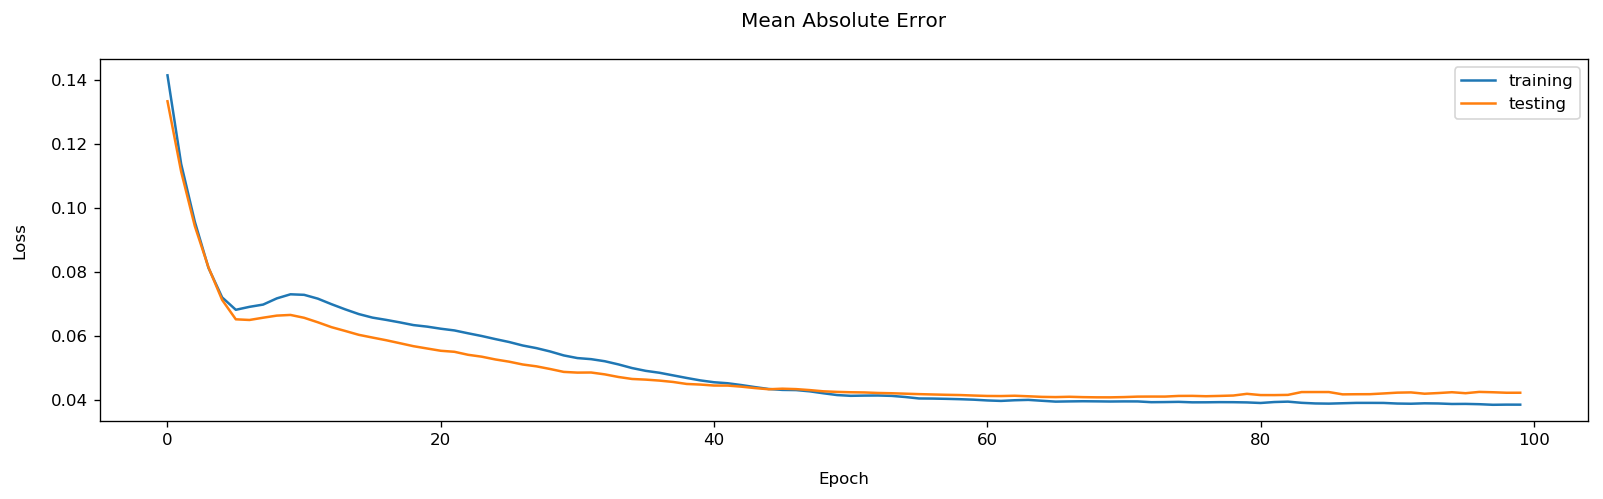

In [22]:
plt.figure(dpi=120, figsize=(16,4))

plt.plot(classifier.history['mean_absolute_error'])
plt.plot(classifier.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['training', 'testing'], loc='upper right')
plt.show()

#### Comparison between actual and predicted result

In [23]:
y_pred = model.predict(X_test)

y_pred = y_pred.reshape(-1).astype(float)
y_test = y_test.reshape(-1).astype(float)

a = 0
for i in range(len(X_test)):
    print('Actual : %.6f  Predicted : %.6f' % (y_test[i], y_pred[i]))
    

Actual : 0.040404  Predicted : 0.047712
Actual : 0.379070  Predicted : 0.144873
Actual : 0.130147  Predicted : 0.129402
Actual : 0.052951  Predicted : 0.073340
Actual : 0.070707  Predicted : 0.075059
Actual : 0.101010  Predicted : 0.120204
Actual : 0.089968  Predicted : 0.091339
Actual : 0.535354  Predicted : 0.439377
Actual : 0.050734  Predicted : 0.075301
Actual : 0.130147  Predicted : 0.149316
Actual : 0.187236  Predicted : 0.148758
Actual : 0.268401  Predicted : 0.183863
Actual : 0.050734  Predicted : 0.057563
Actual : 0.141414  Predicted : 0.113321
Actual : 0.187236  Predicted : 0.289055
Actual : 0.296566  Predicted : 0.313274
Actual : 0.242893  Predicted : 0.252731
Actual : 0.187236  Predicted : 0.197946
Actual : 0.393939  Predicted : 0.344708
Actual : 0.050734  Predicted : 0.050028
Actual : 0.160808  Predicted : 0.152558
Actual : 0.187236  Predicted : 0.172250
Actual : 0.130147  Predicted : 0.099108
Actual : 0.089968  Predicted : 0.128599
Actual : 0.089968  Predicted : 0.072771


In [24]:
df_result = pd.DataFrame()

df_result['Actual'] = y_test
df_result['Predicted'] = y_pred

df_result.head(20)

,Actual,Predicted
0,0.040404,0.047712
1,0.379070,0.144873
2,0.130147,0.129402
3,0.052951,0.073340
4,0.070707,0.075059
5,0.101010,0.120204
6,0.089968,0.091339
7,0.535354,0.439377
8,0.050734,0.075301
9,0.130147,0.149316


<br>
#### Visualization between actual and predicted results

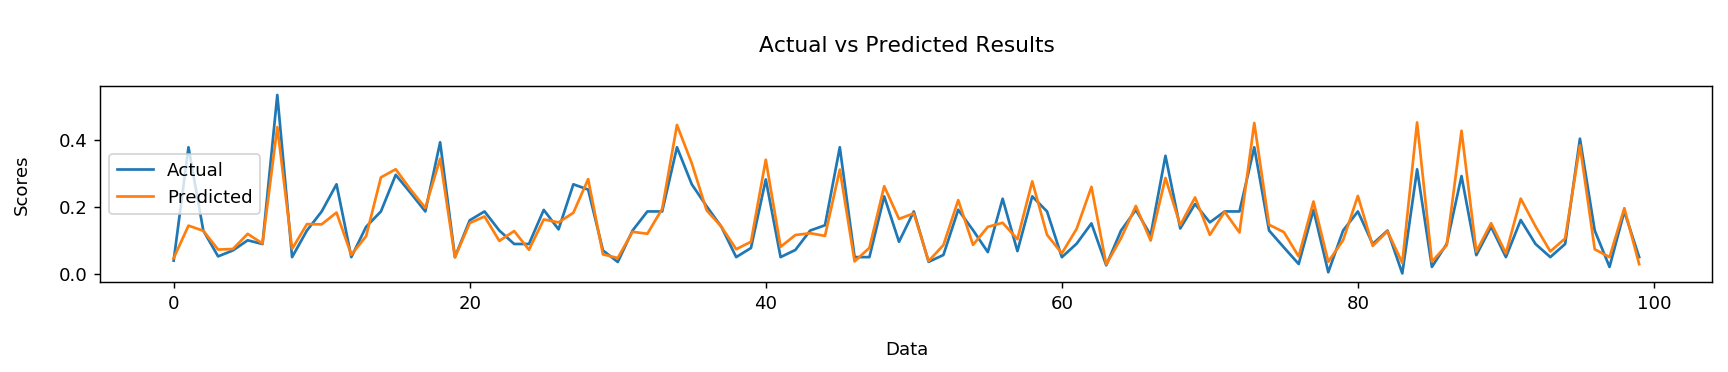

In [25]:
plt.figure(dpi=130, figsize=(16,2))

plt.plot(df_result.Actual)
plt.plot(df_result.Predicted)
plt.xlabel('\nData')
plt.ylabel('Scores\n')
plt.title("\nActual vs Predicted Results\n") 
plt.legend()

plt.show()

#### Analyze the minimum of mean squared error and mean absolute error

p/s: <br>
<i>loss and mean_squared_error is the same
<br>val_loss and val_mean_squared_error is the same</i>

In [26]:
df_history = pd.DataFrame()

df_history = df_history.from_dict(classifier.history)

df_history.describe()

,val_loss,val_mean_squared_error,val_mean_absolute_error,loss,mean_squared_error,mean_absolute_error
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.006076,0.006076,0.049429,0.006282,0.006282,0.050306
std,0.003292,0.003292,0.014420,0.004900,0.004900,0.016774
min,0.003967,0.003967,0.040922,0.003226,0.003226,0.038596
25%,0.004649,0.004649,0.041794,0.003423,0.003423,0.039455
50%,0.005512,0.005512,0.042624,0.004036,0.004036,0.041568
75%,0.006086,0.006086,0.052237,0.007854,0.007854,0.058436
max,0.028896,0.028896,0.133414,0.034743,0.034743,0.141516
